In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import umap
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
data = '/users/ariar/PrimaryBid/V3TWSDMaster.csv'
df = pd.read_csv(data)

In [3]:
col_names = ['yearsInvesting','investmentHoldings','confidence','numOffers','TTV','ogLastTXN','lastTXN','offerNames','age','signUpDate','ogSignUpDate','broker','avgSubscribedAmount','firstOffer','clientSource']
df.columns = col_names

In [5]:
# print(dfActive)
dfNew = df.copy()
dfNew['signUpDate']= pd.to_datetime(dfNew['signUpDate'])
dfNew['lastTXN']= pd.to_datetime(dfNew['lastTXN'])
dfNew.info()
# print(dfNew['signUpDate'].head(30))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   yearsInvesting       866 non-null    object        
 1   investmentHoldings   866 non-null    object        
 2   confidence           866 non-null    int64         
 3   numOffers            554 non-null    float64       
 4   TTV                  554 non-null    float64       
 5   ogLastTXN            554 non-null    object        
 6   lastTXN              554 non-null    datetime64[ns]
 7   offerNames           554 non-null    object        
 8   age                  821 non-null    float64       
 9   signUpDate           828 non-null    datetime64[ns]
 10  ogSignUpDate         828 non-null    object        
 11  broker               558 non-null    object        
 12  avgSubscribedAmount  828 non-null    float64       
 13  firstOffer           411 non-null  

In [8]:
dfNew["yearsInvesting"] = dfNew["yearsInvesting"].fillna("NA")
dfNew["investmentHoldings"] = dfNew["investmentHoldings"].fillna("NA")
dfNew["numOffers"] = dfNew["numOffers"].fillna(0)
dfNew["TTV"] = dfNew["TTV"].fillna(0)
dfNew["ogLastTXN"] = dfNew["ogLastTXN"].fillna("NA")
dfNew["lastTXN"] = dfNew["lastTXN"].fillna("NA")
dfNew["offerNames"] = dfNew["offerNames"].fillna("NA")
dfNew["signUpDate"] = dfNew["signUpDate"].fillna("NA")
dfNew["ogSignUpDate"] = dfNew["ogSignUpDate"].fillna("NA")
dfNew["broker"] = dfNew["broker"].fillna("NA")
dfNew["avgSubscribedAmount"] = dfNew["avgSubscribedAmount"].fillna(0)
dfNew["firstOffer"] = dfNew["firstOffer"].fillna("N/A")
dfNew["clientSource"] = dfNew["clientSource"].fillna("Unknown")
conMean = dfNew["confidence"].mean()
ageMean = dfNew["age"].mean()
dfNew["age"] = dfNew["age"].fillna(int(ageMean)) #age replaced with mean
dfNew["confidence"] = dfNew["confidence"].fillna(conMean) #confidence replaced with mean

In [9]:
dfNew.isnull().sum()

yearsInvesting         0
investmentHoldings     0
confidence             0
numOffers              0
TTV                    0
ogLastTXN              0
lastTXN                0
offerNames             0
age                    0
signUpDate             0
ogSignUpDate           0
broker                 0
avgSubscribedAmount    0
firstOffer             0
clientSource           0
dtype: int64

In [15]:


preWeb = False
postWeb = False
twoDeals = False
recent = False
noDeals = False
preWebList = []
postWebList = []
twoDealList = []
recentList = []
noDealsList = []

activeWebL = []
activePostWebL = []
inactiveChurnedWebL = []
inactiveChurnedPostWebL = []

for k in dfNew["signUpDate"]:
    preWeb = False
    postWeb = False
    noDeals = False
    if "-" not in str(k):
        noDeals = True
        
    elif "2021-03-08" > str(k):
        preWeb = True
        
    else:
        postWeb = True
        
    noDealsList.append(noDeals)
    preWebList.append(preWeb)
    postWebList.append(postWeb)
    
for k in dfNew["offerNames"]:
    twoDeals = False
    if "," in str(k):
        twoDeals = True
    twoDealList.append(twoDeals)
for k in dfNew["lastTXN"]:
    recent = False
    if "2021-05-10" < str(k) and "-" in str(k):
        recent = True
    recentList.append(recent)

i = 0        
while i < len(recentList):
    if preWebList[i] and twoDealList[i] and recentList[i]:
        activeWebL.append(True)
    else:
        activeWebL.append(False)
    
    if postWebList[i] and twoDealList[i] and recentList[i]:
        activePostWebL.append(True)
    else:
        activePostWebL.append(False)
        
    if preWebList[i] and twoDealList[i] and not recentList[i]:
        inactiveChurnedWebL.append(True)
    else:
        inactiveChurnedWebL.append(False)
    if postWebList[i] and twoDealList[i] and not recentList[i]:
        inactiveChurnedPostWebL.append(True)
    else:
        inactiveChurnedPostWebL.append(False)
    i += 1
    

    
dfNew['activeWeb'] = activeWebL
dfNew['activePostWeb'] = activePostWebL
dfNew["inactiveChurnedWeb"] = inactiveChurnedWebL
dfNew["inactiveChurnedPostWeb"] = inactiveChurnedPostWebL


Text(0.5, 1.0, 'Active Web Users')

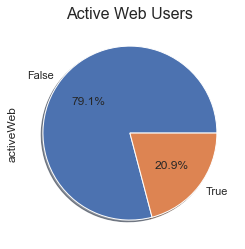

In [21]:
ax = dfNew["activeWeb"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
ax.set_title("Active Web Users",fontsize=16)


Text(0.5, 1.0, 'Active Post Web Users')

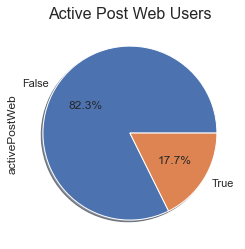

In [22]:
ax = dfNew["activePostWeb"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
ax.set_title("Active Post Web Users",fontsize=16)

Text(0.5, 1.0, 'Inactive Churned Web Users')

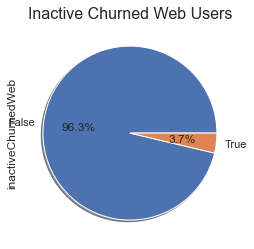

In [23]:
ax = dfNew["inactiveChurnedWeb"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
ax.set_title("Inactive Churned Web Users",fontsize=16)

Text(0.5, 1.0, 'Inactive Churned Post Web Users')

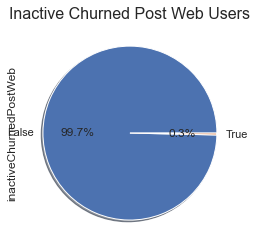

In [20]:
ax = dfNew["inactiveChurnedPostWeb"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
ax.set_title("Inactive Churned Post Web Users",fontsize=16)

In [24]:
# changing the precision of the 'Age' column
# df['age']= df['age'].astype(str).apply(lambda x: x.replace('.0', ''))
# create a column for the age group.
dfNew['avgSubGroup'] = ''
# group 1 is 18-30 people
dfNew['avgSubGroup'] = np.where(
(dfNew['avgSubscribedAmount'] <= 0) & (dfNew['avgSubscribedAmount'] > -1) , '0', dfNew['avgSubGroup'])
#group
dfNew['avgSubGroup'] = np.where(
(dfNew['avgSubscribedAmount'] <= 3000) & (dfNew['avgSubscribedAmount'] >= 1) , '1-3K', dfNew['avgSubGroup'])
# group 2 is 30-40 years people
dfNew['avgSubGroup'] = np.where(
(dfNew['avgSubscribedAmount'] <= 100000) & (dfNew['avgSubscribedAmount'] > 10000) , '10K-10,000K', dfNew['avgSubGroup'])
# group 3 is 40-50 years old
dfNew['avgSubGroup'] =  np.where(
(dfNew['avgSubscribedAmount'] <=1000000) & (dfNew['avgSubscribedAmount'] > 100000) , '> 10,000K', dfNew['avgSubGroup'])




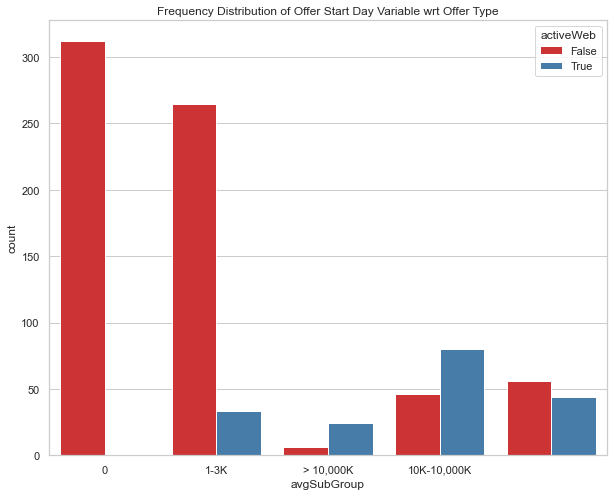

In [25]:
f, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x="avgSubGroup", hue="activeWeb", data=dfNew, palette="Set1")
ax.set_title("Frequency Distribution of Average Subscribed Amount for Active Web Users")
plt.show()

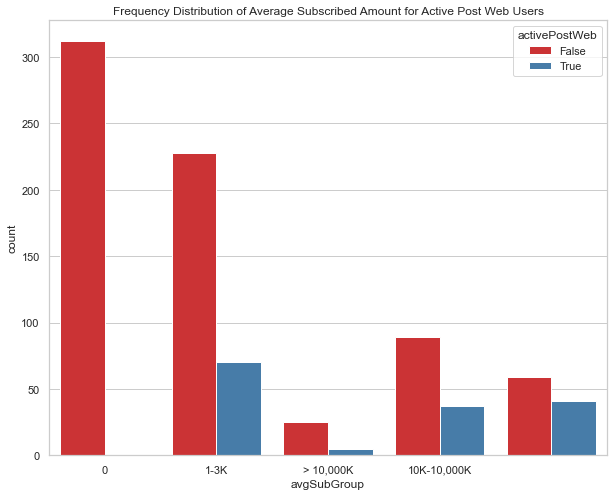

In [26]:
f, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x="avgSubGroup", hue="activePostWeb", data=dfNew, palette="Set1")
ax.set_title("Frequency Distribution of Average Subscribed Amount for Active Post Web Users")
plt.show()

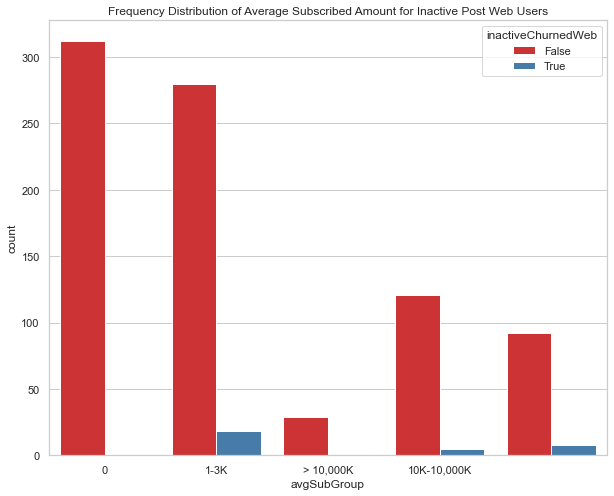

In [28]:
f, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x="avgSubGroup", hue="inactiveChurnedWeb", data=dfNew, palette="Set1")
ax.set_title("Frequency Distribution of Average Subscribed Amount for Inactive Post Web Users")
plt.show()

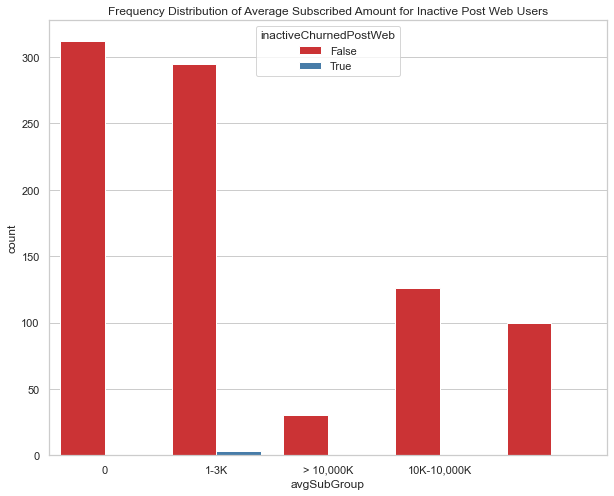

In [29]:
f, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x="avgSubGroup", hue="inactiveChurnedPostWeb", data=dfNew, palette="Set1")
ax.set_title("Frequency Distribution of Average Subscribed Amount for Inactive Post Web Users")
plt.show()

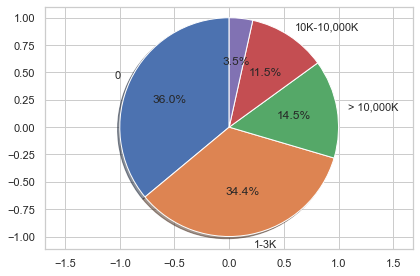

In [38]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = dfNew["avgSubGroup"].unique()
sizes = dfNew["avgSubGroup"].value_counts()
labels_gender = dfNew["activeWeb"].unique()
sizes_gender = dfNew["activeWeb"].value_counts()

 
# Plot
plt.pie(sizes, labels=labels, startangle=90,frame=True,autopct='%1.1f%%',shadow=True)
# plt.pie(sizes_gender,radius=0.75,startangle=90,autopct='%1.1f%%',shadow=True)
# centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()